In [1]:
import pandas as pd
import numpy as np
import collections

data = pd.read_csv("201604120820-Kollerauktionen_ch_auction_price.csv", warn_bad_lines=True, error_bad_lines=False)
print data.columns

Index([u'Sale Name', u'Sale Date', u'Sale Location', u'Sale Number',
       u'Lot Number', u'Lot Title', u'Lot Description', u'High Estimate',
       u'Low Estimate', u'Price', u'Currency', u'Status', u'Maker',
       u'Image URL', u'Provenance', u'Literature', u'Notes', u'URL'],
      dtype='object')


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%m/%d/%Y', errors='coerce')
data.index = data['Sale Date']
data = data.sort('Sale Date')

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [4]:
yearData = data[pd.notnull(data['Sale Date'])]
yearData['Year'] = pd.DatetimeIndex(yearData['Sale Date']).year

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


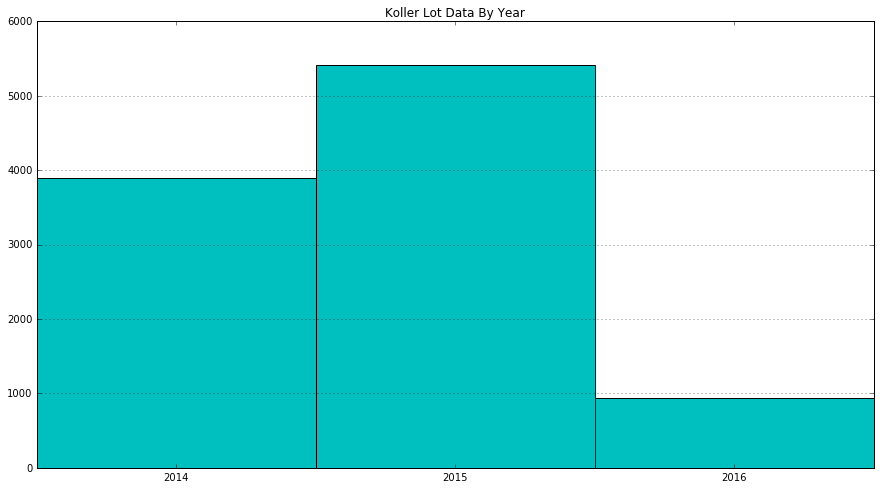

In [5]:
counter = collections.Counter(yearData['Year'])
values = counter.values()[1:]
values.append(counter.values()[0])
keys = counter.keys()[1:]
keys.append(counter.keys()[0])

plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(values)), values, 1.0, color = 'c')
plt.xticks(np.arange(len(counter.values())) + 0.5, [x for x in range(2014, 2017)])
plt.gca().yaxis.grid(True)
plt.title('Koller Lot Data By Year')

In [6]:
df = {}
numbers = []

for x in data.columns:
    df[x] = data[pd.notnull(data[x])]
    numbers.append(len(df[x])/float(len(data)))

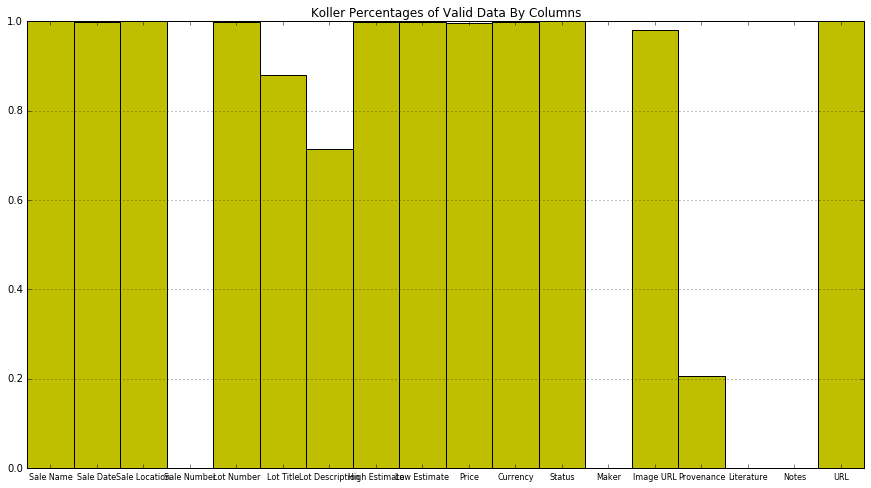

In [7]:
plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(numbers)), numbers, 1.0, color = 'y')
plt.xticks(np.arange(len(numbers)) + 0.5, data.columns, fontsize = 8)
plt.gca().yaxis.grid(True)
plt.title('Koller Percentages of Valid Data By Columns')

In [8]:
oldNumber = np.load('old_numbers.npy')
newNumber = np.load('new_numbers.npy')
oldTime = np.load('old_times.npy')
newTime = np.load('new_times.npy')

In [9]:
numbers = list(oldNumber) + list(newNumber)
times = list(oldTime) + list(newTime)

In [10]:
simple = []
for x in numbers:
    simple.append(int(x))

In [11]:
clean = []
for x in times:
    try:
        clean.append(x.split('Auction ')[1].split(', ')[0])
    except:
        clean.append('')

In [12]:
data = pd.DataFrame()

data['Number'] = simple
data['Sale Date'] = clean

In [13]:
data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%d.%m.%Y', errors='coerce')
data.index = data['Sale Date']
data = data.sort('Sale Date')

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [14]:
yearData = data[pd.notnull(data['Sale Date'])]
#yearData['Year'] = pd.DatetimeIndex(yearData['Sale Date']).year

In [15]:
yearData['Year'] = pd.DatetimeIndex(yearData['Sale Date']).year

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
yearGroup = yearData.groupby(['Year', 'Number']).Number.sum()

In [17]:
yearGroup.xs(2005).index

Int64Index([27, 44, 75, 172, 266], dtype='int64', name=u'Number')

In [18]:
years = sorted(list(set(yearData['Year'])))

In [19]:
num = []
for x in years:
    num.append(sum(yearGroup.xs(x).index))

In [20]:
newvalues = [0 for x in range(2005, 2014)]+ list(values)

Populating the interactive namespace from numpy and matplotlib


[-0.5, 12, 0, 6000]

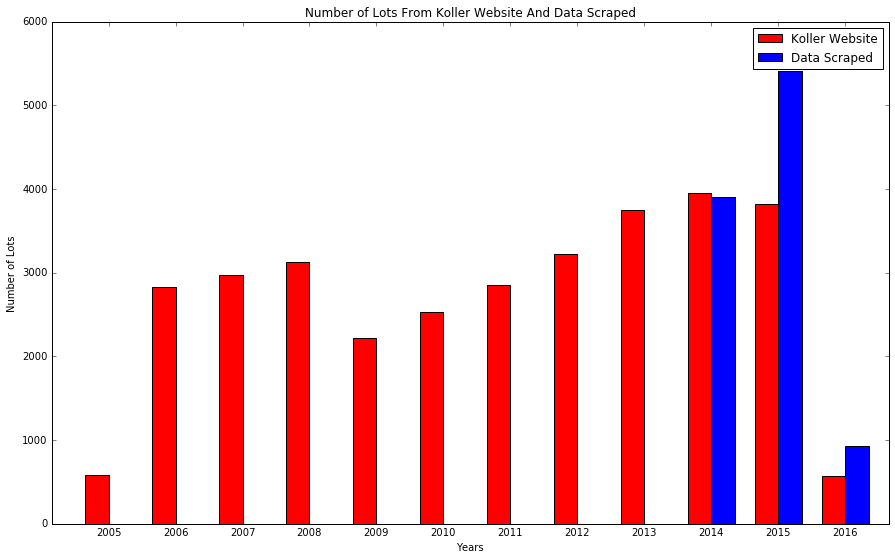

In [21]:
%pylab inline

n_groups = len(num)

means_men = tuple(num)
means_women = tuple(newvalues)

fig, ax = plt.subplots(figsize=(15,9))
index = np.arange(n_groups)
bar_width = 0.35

opacity = 1

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Koller Website')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Data Scraped')

plt.xlabel('Years')
plt.ylabel('Number of Lots')
plt.title('Number of Lots From Koller Website And Data Scraped')
plt.xticks(index + bar_width, tuple([x for x in range(2005, 2017)]))
plt.legend(loc = 'upper right')
plt.axis([-0.5, 12, 0, 6000])